# Medical Appointment No Shows.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The Medical Appointment dataset show the features relavent to the attendance of patients to the appointment. We have some columns related to the type of illnes as (Hipertension, Diabetes, Alcoholism, Handcap) and others mention if the patient receives a SMS or not. In addition it has columns of ages and day of appointment as well as scheduled day.

In [52]:
# Used modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
%matplotlib inline

In [53]:
# load the data
df = pd.read_csv('noshowappointments.csv')

In [8]:
# display some rows
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


### Some ot the questions that can be asked:
<ol>
<li>How can SMS affect the attendance of patients?</li>
<li>What is the relation between ages of patients and their absence from the appointment?</li>
<li>Is the peroid between Scheduled day and Appointment day is a factor that lead the patients to miss up their appointments?</li>
</ol>


<a id='wrangling'></a>
## Data Wrangling

### Data Assessment

In [9]:
# look at the types of columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


As we see, although we havn't null values but some data types of columns should be changed. In addition, some columns has wrong spelling.

In [10]:
# statistics for the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here, the minimum age is -1 which doesn't make sense.

Most of patients are younger than 37 years old.

Handicap column may have categories or non real data as the max value is 4.

In [11]:
# Check for duplicates for all rows
df.duplicated().any()

False

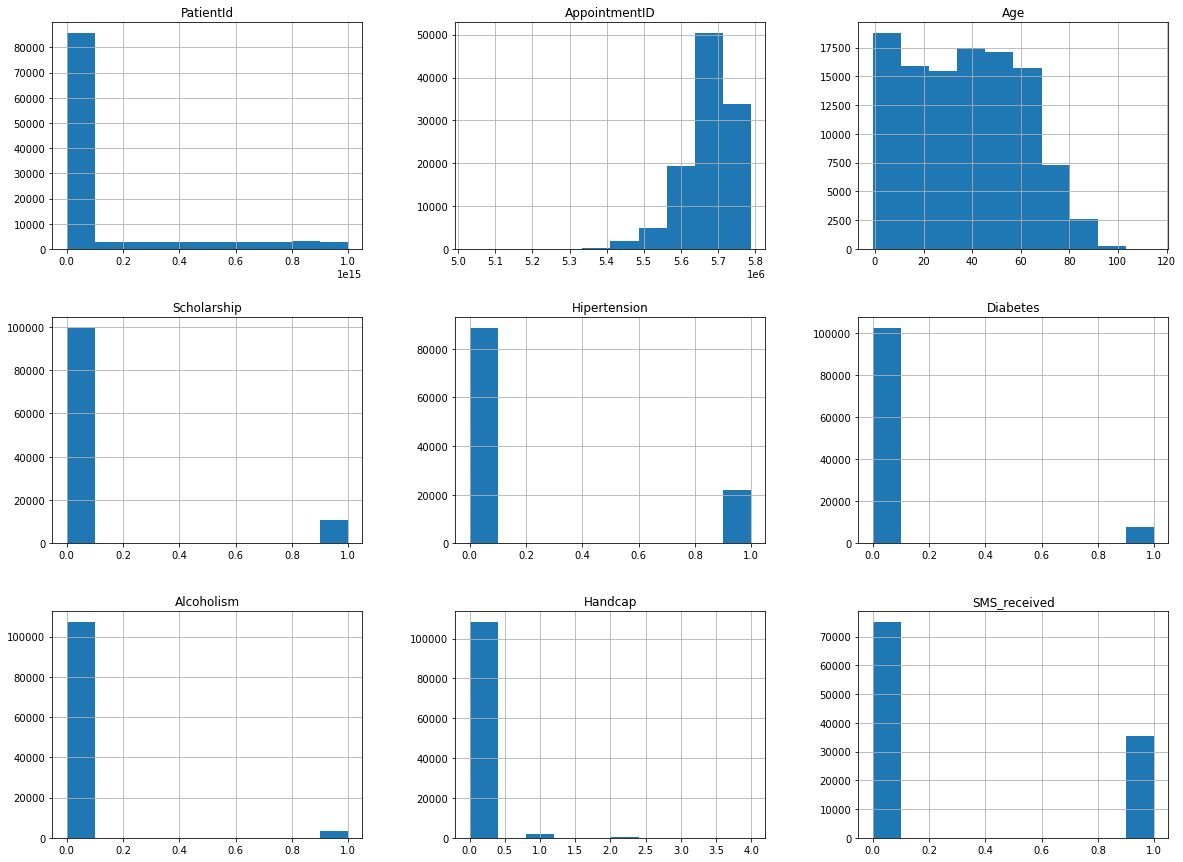

In [12]:
df.hist(figsize=(20,15));

### Data Cleaning

In [13]:
# Rename some columns
df = df.rename(columns = {'PatientId' : 'PatientID', 'No-show' : 'Show', 'Hipertension' : 'Hypertension', 'Handcap' : 'Handicap'})

In [14]:
# Change datatype for some columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['PatientID'] = df['PatientID'].astype(np.int64)

In [15]:
# Check for unique values
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [16]:
# Check for unique values
df['Handicap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

The handicap refers to the number of desabilites a person has.

In [17]:
# Check for unique values
df['Show'].value_counts()

No     88208
Yes    22319
Name: Show, dtype: int64

Since the minimum age was -1 so there's upnormal age values

In [18]:
# Check for upnormal age values
df.query('Age < 1')['Age'].value_counts()

 0    3539
-1       1
Name: Age, dtype: int64

Age can't be samller than zero.

In [21]:
# clean the data according to the age values
df = df[df['Age'] != -1]

Replace the values of Show column to be more representative

In [22]:
# Replace values in Show column to be more suitable for the new name
df['Show'].replace({"Yes" : "No", "No" : "Yes"}, inplace=True)

In [23]:
# Add some columns 
df['Scheduled_Date'] = df['ScheduledDay'].dt.date
df['Appointment_Date'] = df['AppointmentDay'].dt.date

df['Delta_dates'] = (df['Appointment_Date'] - df['Scheduled_Date']).dt.days

In [24]:
# check for truth of data
(df['Appointment_Date'] < df['Scheduled_Date']).sum()

5

In [25]:
# delete rows which has AppointmentDate before ScheduledDate
df = df[df['Appointment_Date'] >= df['Scheduled_Date']]

In [26]:
# check for duplication in appointmentid
df['AppointmentID'].duplicated().any()

False

In [27]:
# drop unuseful columns for the analysis
df.drop(['ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [28]:
# reset row index
df = df.reset_index()

In [29]:
# Check for info after alteration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110521 entries, 0 to 110520
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             110521 non-null  int64 
 1   PatientID         110521 non-null  int64 
 2   AppointmentID     110521 non-null  int64 
 3   Gender            110521 non-null  object
 4   Age               110521 non-null  int64 
 5   Neighbourhood     110521 non-null  object
 6   Scholarship       110521 non-null  int64 
 7   Hypertension      110521 non-null  int64 
 8   Diabetes          110521 non-null  int64 
 9   Alcoholism        110521 non-null  int64 
 10  Handicap          110521 non-null  int64 
 11  SMS_received      110521 non-null  int64 
 12  Show              110521 non-null  object
 13  Scheduled_Date    110521 non-null  object
 14  Appointment_Date  110521 non-null  object
 15  Delta_dates       110521 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 

<a id='eda'></a>
## Exploratory Data Analysis

Since the main objective of this analysis to know what affect the attendance of patients, we will group the data according to patients who attended and did't attend.

In [30]:
# filter based on Show status
show_no = df[df['Show'] == 'No']
show_yes = df[df['Show'] == 'Yes']


### How can SMS affect the attendance of patients?
we will study the percentages of patients who attended and didn't attend the appointment versus if they have received SMS or not.

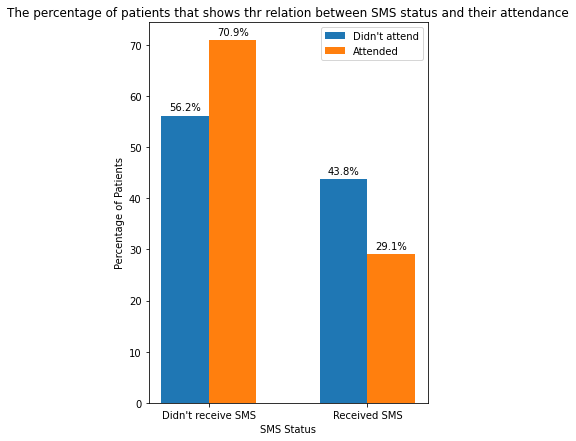

In [55]:
def create_bar_plot(df, plot_arrangment, label = None):
    '''
    create a bar plot for a specific feature
    
    Args:
        df: Pandas Data Frame
            Type: Pandas Data Frame
            
        plot_arrangment: The arrangment of the plot in the figure
            Type: int
        
        label: optional argument if the user want to add label for the plot
            Type: string
    
    Returns:
        bar plot
    '''
    # bar width
    w = 0.3
    # Ensure the input is int
    plot_arrangment = math.ceil(plot_arrangment)

    # plot bar chart for patients who didn't attend
    if plot_arrangment == 1:
        x = [0,1]
    else:
        x = [0+(w*(plot_arrangment-1)), 1+(w*(plot_arrangment-1))]
    bars_no = plt.bar(x, df.values, w, label = label)

    # Add percentage labels above the bars
    for bar, value in zip(bars_no, df.values):
        width = bar.get_width()
        height = bar.get_height()
        x, y = bar.get_xy()
        plt.text(x+width/2, height+1, str(value) + "%", ha="center")
    

# filteration to select the SMS column for all patients who didn't attend and calculate the percentage of SMS_received
SMS_status_no = round(show_no['SMS_received'].value_counts(normalize = True)*100, 1)

# filteration to select the SMS column for all patients who attended and calculate the percentage of SMS_received
SMS_status_yes = round(show_yes['SMS_received'].value_counts(normalize = True)*100, 1)

# Creating figure
plt.figure(figsize=(5,7))

# plot bar chart for patients who didn't attend
create_bar_plot(SMS_status_no, 1, label = "Didn't attend")
# plot bar chart for patients who attended
create_bar_plot(SMS_status_yes, 2, label = "Attended")

plt.legend()
plt.xticks([0+w/2, 1+w/2], ["Didn't receive SMS", "Received SMS"]);
plt.title("The percentage of patients that shows thr relation between SMS status and their attendance")
plt.xlabel("SMS Status")
plt.ylabel("Percentage of Patients");

The results show that most of patients who didn't attend, didn't receive SMS. However, the minority of patients who already attended didn't receive SMS as well.

### What is the relation between ages of patients and their absence from the appointment?

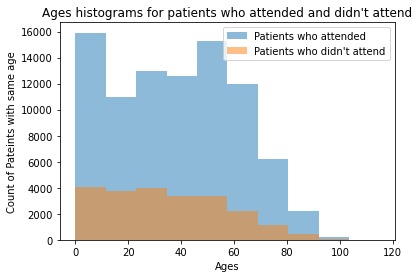

In [45]:
plt.hist(show_yes['Age'], alpha = 0.5, label = 'Patients who attended')
plt.hist(show_no['Age'], alpha = 0.5, label = 'Patients who didn\'t attend')
plt.legend()
plt.title('Ages histograms for patients who attended and didn\'t attend')
plt.xlabel('Ages')
plt.ylabel('Count of Pateints with same age');


The histgrams tell us that most of the younger ages attended the appointment than the older ones.

### Is the period between Scheduled day and Appointment day is a factor that lead the patients to miss up their appointments?

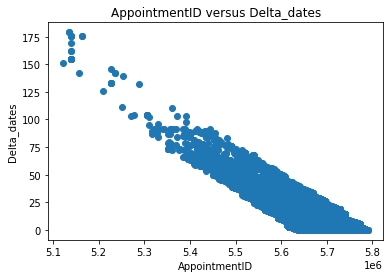

In [50]:
# scatter plot to see the relation between time period and the appointments
plt.scatter(show_no['AppointmentID'], show_no['Delta_dates'])
plt.xlabel('AppointmentID')
plt.ylabel('Delta_dates')
plt.title('AppointmentID versus Delta_dates');

According to the scatter plot, there's a negative correlation between the time peroid between Scheduled day and Appointment day and the appointments.

<a id='conclusions'></a>
## Conclusions

<ol>
    <li>56.2% of the patients who didn't attend the appointment didn't receive SMS. At the same time, 70.9% of the patients who attend the appointment didn't receive SMS as well.</li>
    <li>Most of the patients who didn't attend have from 1 year to 40 years old.</li>
    <li>The long peroid between the Scheduled day and appointment day affect on the attendance of the patients. The patients whose appointment day is far from the scheduled day didn't attend more than the patients who have short period.</li>
</ol>

### Data Limitation
The Age column has 3539 values equal to zero which can't be real value.
The results could be better when replacing those values with real ones.

### Future work
Data about the patients' addresses as well as the location of the hospital or clinic can enhance the analysis to see if the distance between them affect the patients attendance or not.